In [1]:
# We need to import these modules to get started
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# seaborn makes pretty plots & sets font sizes nicely
import seaborn as sns
sns.set_context('notebook', font_scale=1.5, rc={'lines.markeredgewidth': 2})

# magic functions for jupyter notebook plotting
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# confirm that you are currently using the newest version of SDK (2.16.2)
import allensdk
allensdk.__version__

'2.16.2'

In [3]:
import platform
platstring = platform.platform()

if ('Darwin' in platstring) or ('macOS' in platstring):
    # macOS 
    data_root = "/Volumes/Brain2024/"
elif 'Windows'  in platstring:
    # Windows (replace with the drive letter of USB drive)
    data_root = "E:/"
elif ('amzn' in platstring):
    # then on CodeOcean
    data_root = "/data/"
else:
    # then your own linux platform
    # EDIT location where you mounted hard drive
    data_root = "/media/$USERNAME/Brain2024/"

In [4]:
# import behavior projet cache class from SDK to be able to load the data
from allensdk.brain_observatory.behavior.behavior_project_cache import VisualBehaviorOphysProjectCache

cache = VisualBehaviorOphysProjectCache.from_local_cache(cache_dir=data_root, use_static_cache=True)
# if we needed to download the data we could have used the following line
# cache = VisualBehaviorOphysProjectCache.from_s3_cache(cache_dir=data_root)  

# Get table describing ophys experiments *MOST USEFUL TABLE TO LOOK AT
ophys_experiments = cache.get_ophys_experiment_table()  

print('Number of ophys experiments = {}'.format(len(ophys_experiments)))

# get metadata tables
#behavior_sessions = cache.get_behavior_session_table()


#ophys_sessions = cache.get_ophys_session_table()


#ophys_cells = cache.get_ophys_cells_table()

#print number of items in each table for all imaging and behavioral sessions
#print('Number of behavior sessions = {}'.format(len(behavior_sessions)))
#print('Number of ophys sessions = {}'.format(len(ophys_sessions)))

import brain_observatory_utilities.datasets.optical_physiology.data_formatting as data_formatting

import brain_observatory_utilities.datasets.behavior.data_formatting as behavior_data_formatting

import pickle as pickle

Number of ophys experiments = 1936


/opt/conda/lib/python3.10/site-packages/allensdk/brain_observatory/behavior/behavior_project_cache/behavior_project_cache.py:135: UpdatedStimulusPresentationTableWarning: 
	As of AllenSDK version 2.16.0, the latest Visual Behavior Ophys data has been significantly updated from previous releases. Specifically the user will need to update all processing of the stimulus_presentations tables. These tables now include multiple stimulus types delineated by the columns `stimulus_block` and `stimulus_block_name`.

The data that was available in previous releases are stored in the block name containing 'change_detection' and can be accessed in the pandas table by using: 
	`stimulus_presentations[stimulus_presentations.stimulus_block_name.str.contains('change_detection')]`
  warnings.warn(


In [5]:
# Build desired events/dff/behavior table for a single animal

def get_stacked_change_response(ophys_experiment_id):
    # Load the data for this ophys experiment from the cache
    ophys_experiment = cache.get_behavior_ophys_experiment(ophys_experiment_id)
    
    
    stimulus_presentations = behavior_data_formatting.get_annotated_stimulus_presentations(ophys_experiment, epoch_duration_mins=5)


    # Add a column for whether the previous image was novel
    stimulus_presentations['prev_image_novel'] = stimulus_presentations['is_image_novel'].shift(1)
    
    # Save a subset of the columns in stimulus presentations
    stim_presentations_subset = stimulus_presentations[['trials_id','stimulus_block_name', 'image_index', 'image_name', 'duration', 
                                                        'start_time', 'end_time','start_frame', 'end_frame', 'is_change', 'is_image_novel', 
                                                        'prev_image_novel', 'omitted', 'flashes_since_change', 'is_sham_change', 'active',
                                                        'stimulus_name', 'licks', 'change_trials_id', 'change_time', 'go', 'catch', 
                                                        'auto_rewarded', 'hit', 'miss', 'false_alarm', 'correct_reject', 'response_time',
                                                        'reward_time', 'reward_volume', 'response_latency', 'time_from_last_change', 'licked', 
                                                        'stimulus_count_within_trial', 'previous_image_name', 'previous_response_on_trial',
                                                        'previous_change_on_trial', 'could_change', 'pre_change', 'lick_on_next_flash', 
                                                        'pre_omitted', 'post_omitted', 'reward_rate','engaged', 'engagement_state', 'epoch']]
    
    
    
    

    # Get stimulus aligned responses for all cells in this dataset: dFF
    stim_response_dff = data_formatting.get_stimulus_response_df(ophys_experiment, data_type='dff', event_type='changes',
                                                            time_window=[-1, 0.75], response_window_duration=0.25,
                                                            interpolate=True, output_sampling_rate=30)

    # Get stimulus aligned responses for all cells in this dataset: events
    # stim_response_events = data_formatting.get_stimulus_response_df(ophys_experiment, data_type='events', event_type='changes',
    #                                                         time_window=[-1, 0.75], response_window_duration=0.25,
    #                                                         interpolate=True, output_sampling_rate=10)
    
    # Get stimulus aligned responses for all cells in this dataset: filtered events
    stim_response_filtered_events = data_formatting.get_stimulus_response_df(ophys_experiment, data_type='filtered_events', event_type='changes',
                                                            time_window=[-1, 0.75], response_window_duration=0.25,
                                                            interpolate=True, output_sampling_rate=10)
    
    # Get stimulus aligned responses for all cells in this dataset: running speed
    stim_response_running_speed = data_formatting.get_stimulus_response_df(ophys_experiment, data_type='running_speed', event_type='changes',
                                                            time_window=[-1, 0.75], response_window_duration=0.25,
                                                            interpolate=True, output_sampling_rate=30)
    
    # Get stimulus aligned responses for all cells in this dataset: pupil_diameter
    stim_response_pupil_diameter = data_formatting.get_stimulus_response_df(ophys_experiment, data_type='pupil_diameter', event_type='changes',
                                                            time_window=[-1, 0.75], response_window_duration=0.25,
                                                            interpolate=True, output_sampling_rate=30)
    
    
    # Get stimulus aligned responses for all cells in this dataset: lick rate
    stim_response_lick_rate = data_formatting.get_stimulus_response_df(ophys_experiment, data_type='lick_rate', event_type='changes',
                                                            time_window=[-1, 0.75], response_window_duration=0.25,
                                                            interpolate=True, output_sampling_rate=30)
    
 



    # Rename the trace columns to be specific to dff
    stim_response_dff.rename(columns={"trace": "dff_trace", "mean_response": "dff_mean_response", 
                                  "baseline_response": "dff_baseline_response"}, inplace=True)

    
    
     # Add the filtered events trace columns to the stim_response_dff data frame
    stim_response_dff['filtered_events_trace'] = stim_response_filtered_events['trace']
    stim_response_dff['filtered_events_mean_response'] = stim_response_filtered_events['mean_response']
    stim_response_dff['filtered_events_baseline_response'] = stim_response_filtered_events['baseline_response']
    stim_response_dff['filtered_events_trace_timestamps'] = stim_response_filtered_events['trace_timestamps']
    
    
    n_cells = len(stim_response_dff.cell_specimen_id.unique())
    
    # Add the running_speed trace columns to the stim_response_dff data frame
    stim_response_dff['running_speed_trace'] = np.repeat(stim_response_running_speed.trace.values, n_cells)
    stim_response_dff['running_speed_mean_response'] = np.repeat(stim_response_running_speed.mean_response.values, n_cells)
    stim_response_dff['running_speed_baseline_response'] = np.repeat(stim_response_running_speed.baseline_response.values, n_cells)
    
    
    # Add the pupil_diameter trace columns to the stim_response_dff data frame
    stim_response_dff['pupil_diameter_trace'] = np.repeat(stim_response_pupil_diameter.trace.values, n_cells)
    stim_response_dff['pupil_diameter_mean_response'] = np.repeat(stim_response_pupil_diameter.mean_response.values, n_cells)
    stim_response_dff['pupil_diameter_baseline_response'] = np.repeat(stim_response_pupil_diameter.baseline_response.values, n_cells)
    
    
    # Add the lick_rate trace columns to the stim_response_dff data frame
    stim_response_dff['lick_rate_trace'] = np.repeat(stim_response_lick_rate.trace.values, n_cells)
    stim_response_dff['lick_rate_mean_response'] = np.repeat(stim_response_lick_rate.mean_response.values, n_cells)
    stim_response_dff['lick_rate_baseline_response'] = np.repeat(stim_response_lick_rate.baseline_response.values, n_cells)
    
    
    # Merge the stimulus response dataframe with the stimulus table to get information about what stimuli were presented 
    stim_response_stack = stim_response_dff.merge(stim_presentations_subset, on='stimulus_presentations_id')



    stim_response_stack['ophys_experiment_id'] = ophys_experiment_id

    

    return stim_response_stack
    

In [6]:
ophys_experiments = ophys_experiments.sort_values(by=['cre_line', 'mouse_id', 'date_of_acquisition'])
#ophys_experiments[['mouse_id', 'cre_line', 'sex', 'date_of_acquisition', 'session_type', 'session_number', 'prior_exposures_to_image_set', 'prior_exposures_to_session_type']]

In [7]:
# Get only the OPHYS_4 experiments with no prior exposure to the novel image set
subset_ophys_experiments = ophys_experiments[(ophys_experiments.project_code=='VisualBehaviorMultiscope4areasx2d')&
                        (ophys_experiments.session_number==4) &
                        (ophys_experiments.prior_exposures_to_image_set==0)]

# Sort the filtered experiments by genotype, sex, mouse ID
subset_ophys_experiments = subset_ophys_experiments.sort_values(by=['cre_line', 'targeted_structure', 'sex', 'mouse_id'])


#subset_ophys_experiments[['cre_line', 'targeted_structure', 'sex', 'mouse_id', 'session_type', 'prior_exposures_to_image_set', 'prior_exposures_to_session_type']]

# there are 4 Slc17a7 animals, 4 Sst animals, and 4 Vip animals

In [8]:
# Get only the slc17a7 experiments with no prior exposure to the novel image set
slc17a7_ophys_experiments = subset_ophys_experiments[(subset_ophys_experiments.cre_line=='Slc17a7-IRES2-Cre')]

# Get only the Sst experiments
sst_ophys_experiments = subset_ophys_experiments[(subset_ophys_experiments.cre_line=='Sst-IRES-Cre')]

# Get only the Vip experiments
vip_ophys_experiments = subset_ophys_experiments[(subset_ophys_experiments.cre_line=='Vip-IRES-Cre')]


In [9]:
# CHANGE THIS TO ITERATE OVER GENOTYPES
curr_mouse_genotype = slc17a7_ophys_experiments

# CHANGE THIS TO SAVE TO THE CORRECT FOLDER
end_folder = 'slc17a7-cre'

# CHANGE THIS TO ITERATE OVER MICE OF A GIVEN GENOTYPE
#curr_mouse_index = 3

In [10]:
curr_mouse_genotype.groupby(['mouse_id', 'ophys_experiment_id']).count().reset_index().groupby(['mouse_id']).count()[['ophys_experiment_id']]


,ophys_experiment_id
mouse_id,
472271,7
484408,8
484631,5
513630,7


In [11]:
# Get the list of mouse ids for the current genotype
mouse_id_list = curr_mouse_genotype.mouse_id.unique()
mouse_id_list

array(['484631', '513630', '472271', '484408'], dtype=object)

In [12]:
# Get the mouse id for the current index
# curr_mouse_id = mouse_id_list[curr_mouse_index]
# curr_mouse_id

In [13]:
#Get the list of experiment ids for the current mouse
# curr_mouse_exp_list = np.array(curr_mouse_genotype[curr_mouse_genotype.mouse_id==curr_mouse_id].index)
# curr_mouse_exp_list

In [14]:
#  stacked_data_all = {}
# for exp_id in curr_mouse_exp_list:
#     stacked_data_all[exp_id]= get_stacked_change_response(exp_id)
    
    

In [15]:
stacked_dict = {}

for mouse_id in mouse_id_list:
    curr_mouse_exp_list = np.array(curr_mouse_genotype[curr_mouse_genotype.mouse_id==mouse_id].index)
    
    # Initialize the stacked data frame containing trace info around image changes for each cell
    stacked_data_df = pd.DataFrame()
    
    # Run through each ophys experiment ID for a single mouse
    for exp_id in curr_mouse_exp_list:
        curr_df = get_stacked_change_response(exp_id)
        stacked_data_df = pd.concat([stacked_data_df, curr_df], ignore_index=True)
        
        
        
    prev_image_novel = stacked_data_df['prev_image_novel'].to_numpy()
    is_image_novel = stacked_data_df['is_image_novel'].to_numpy()

    # Define the conditions as boolean ndarrays
    conditions = [
    (prev_image_novel == True) & (is_image_novel == True),   # 'nn'
    (prev_image_novel == True) & (is_image_novel == False),  # 'nf'
    (prev_image_novel == False) & (is_image_novel == False), # 'ff'
    (prev_image_novel == False) & (is_image_novel == True)   # 'fn'
    ]
    
    # Define the corresponding choices (labels)
    choices = ['nn', 'nf', 'ff', 'fn']
    
    # Assign the 'image_change_type' column based on the conditions
    stacked_data_df['image_change_type'] = np.select(conditions, choices, default=np.nan)

    # Now, 'image_change_type' will contain 'nn', 'nf', 'ff', or 'fn' based on the conditions

    
    
    file_path = '/root/capsule/my_results/pickle_stackedcells_imagechange/' + end_folder + '/'
    #image_path = '/root/capsule/my_results/figures/figures_avgstackedcells_imagechange/'

    
    
    curr_name = 'stacked_data_df_' + mouse_id + '.pkl'
    curr_name_svg = 'stacked_data_df_' + mouse_id + '.svg'
    
    
    # save the current mouse's stacked data frame as a pickle
    stacked_data_df.to_pickle(file_path+curr_name,protocol=5)
    
    # add the mouse and it's stacked data frame to a dictionary for the genotype
    stacked_dict[mouse_id] = stacked_data_df


/opt/conda/lib/python3.10/site-packages/hdmf/utils.py:668: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  return func(args[0], **pargs)
/opt/conda/lib/python3.10/site-packages/brain_observatory_utilities/datasets/behavior/data_formatting.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trials['change_trials_id'] = trials.index.values
100%|██████████| 1/1 [00:00<00:00, 14.74it/s]
/opt/conda/lib/python3.10/site-packages/hdmf/utils.py:668: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  return func(args[0], **pargs)
/opt/conda/lib/python3.10/site-packages/brain_observatory_utilities/datasets/behavior/data_formatting.py:517:

In [16]:
file_path = '/root/capsule/my_results/pickle_stackedcells_imagechange/' + end_folder + '/'
    #image_path = '/root/capsule/my_results/figures/figures_avgstackedcells_imagechange/'


In [17]:
stacked_dict = {}
for mouse_id in mouse_id_list:
    curr_name = 'stacked_data_df_' + mouse_id + '.pkl'
    test_df = pd.read_pickle(file_path+curr_name)
    stacked_dict[mouse_id] = test_df


In [18]:
stacked_data_df = stacked_dict[mouse_id_list[0]]

In [19]:
stacked_data_df = stacked_data_df.merge(subset_ophys_experiments, left_on='ophys_experiment_id', 
                                      right_index=True, how='left')

stacked_data_df.groupby(['cre_line', 'mouse_id', 'targeted_structure', 'cell_specimen_id', 
                         'stimulus_presentations_id']).count().reset_index().groupby(['cre_line', 
                        'mouse_id','targeted_structure', 'cell_specimen_id']).count()[['stimulus_presentations_id']]


stimulus_presentations_id
cre_line          mouse_id targeted_structure cell_specimen_id                           
Slc17a7-IRES2-Cre 484631   VISal              1120095140                              247
                                              1120095238                              247
                                              1120095783                              247
                                              1120095879                              247
                                              1120096002                              247
...                                                                                   ...
                           VISp               1120127959                              247
                                              1120128300                              247
                                              1120128332                              247
                                              1120128364                              247
                                              1120128540                              247

[623 rows x 1 columns]

In [20]:
stacked_data_df.groupby(['image_change_type', 'stimulus_presentations_id']).count().reset_index().groupby(['image_change_type']).count()[['stimulus_presentations_id']]

,stimulus_presentations_id
image_change_type,
ff,8
fn,52
nf,52
nn,135


In [21]:
stim_response_stack = stacked_data_df.copy()

stim_response_stack.sort_values(by=['cre_line', 'mouse_id', 'targeted_structure', 'cell_specimen_id'])
stim_response_stack[['cre_line', 'mouse_id', 'targeted_structure', 'cell_specimen_id', 'dff_trace', 'is_change', 'prev_image_novel', 'is_image_novel']]


,cre_line,mouse_id,targeted_structure,cell_specimen_id,dff_trace,is_change,prev_image_novel,is_image_novel
0,Slc17a7-IRES2-Cre,484631,VISal,1120095140,"[0.0780651985555568, 0.08103971741341441, 0.10...",True,True,False
1,Slc17a7-IRES2-Cre,484631,VISal,1120095238,"[-0.16474546007582178, -0.16413200947750362, -...",True,True,False
2,Slc17a7-IRES2-Cre,484631,VISal,1120095783,"[0.09011350365692353, 0.09131625892946585, 0.1...",True,True,False
3,Slc17a7-IRES2-Cre,484631,VISal,1120095879,"[0.1340801492014635, 0.12836647710346294, 0.08...",True,True,False
4,Slc17a7-IRES2-Cre,484631,VISal,1120096002,"[-0.010353395707268544, -0.019502869954395458,...",True,True,False
...,...,...,...,...,...,...,...,...
153876,Slc17a7-IRES2-Cre,484631,VISp,1120127959,"[-0.12637680432383508, -0.09024034447479032, 0...",True,False,True
153877,Slc17a7-IRES2-Cre,484631,VISp,1120128300,"[-0.09543291552675572, -0.07407093068819733, -...",True,False,True
153878,Slc17a7-IRES2-Cre,484631,VISp,1120128332,"[-0.18738961475407542, -0.18550116473689782, -...",True,False,True
153879,Slc17a7-IRES2-Cre,484631,VISp,1120128364,"[-0.0040659682121066965, -0.020839899364331095...",True,False,True


In [22]:
# Get only the stimulus presentations with image change novel to novel
stim_response_stack_nn = stim_response_stack[(stim_response_stack.prev_image_novel==True)&
                        (stim_response_stack.is_image_novel==True)]

#novel to familiar
stim_response_stack_nf = stim_response_stack[(stim_response_stack.prev_image_novel==True) &
                                         (stim_response_stack.is_image_novel==False)]

#familiar to familiar
stim_response_stack_ff = stim_response_stack[(stim_response_stack.prev_image_novel==False) &
                                         (stim_response_stack.is_image_novel==False)]

#familiar to novel
stim_response_stack_fn = stim_response_stack[(stim_response_stack.prev_image_novel==False) &
                                         (stim_response_stack.is_image_novel==True)]

In [23]:
curr_mouse_id = mouse_id_list[0]

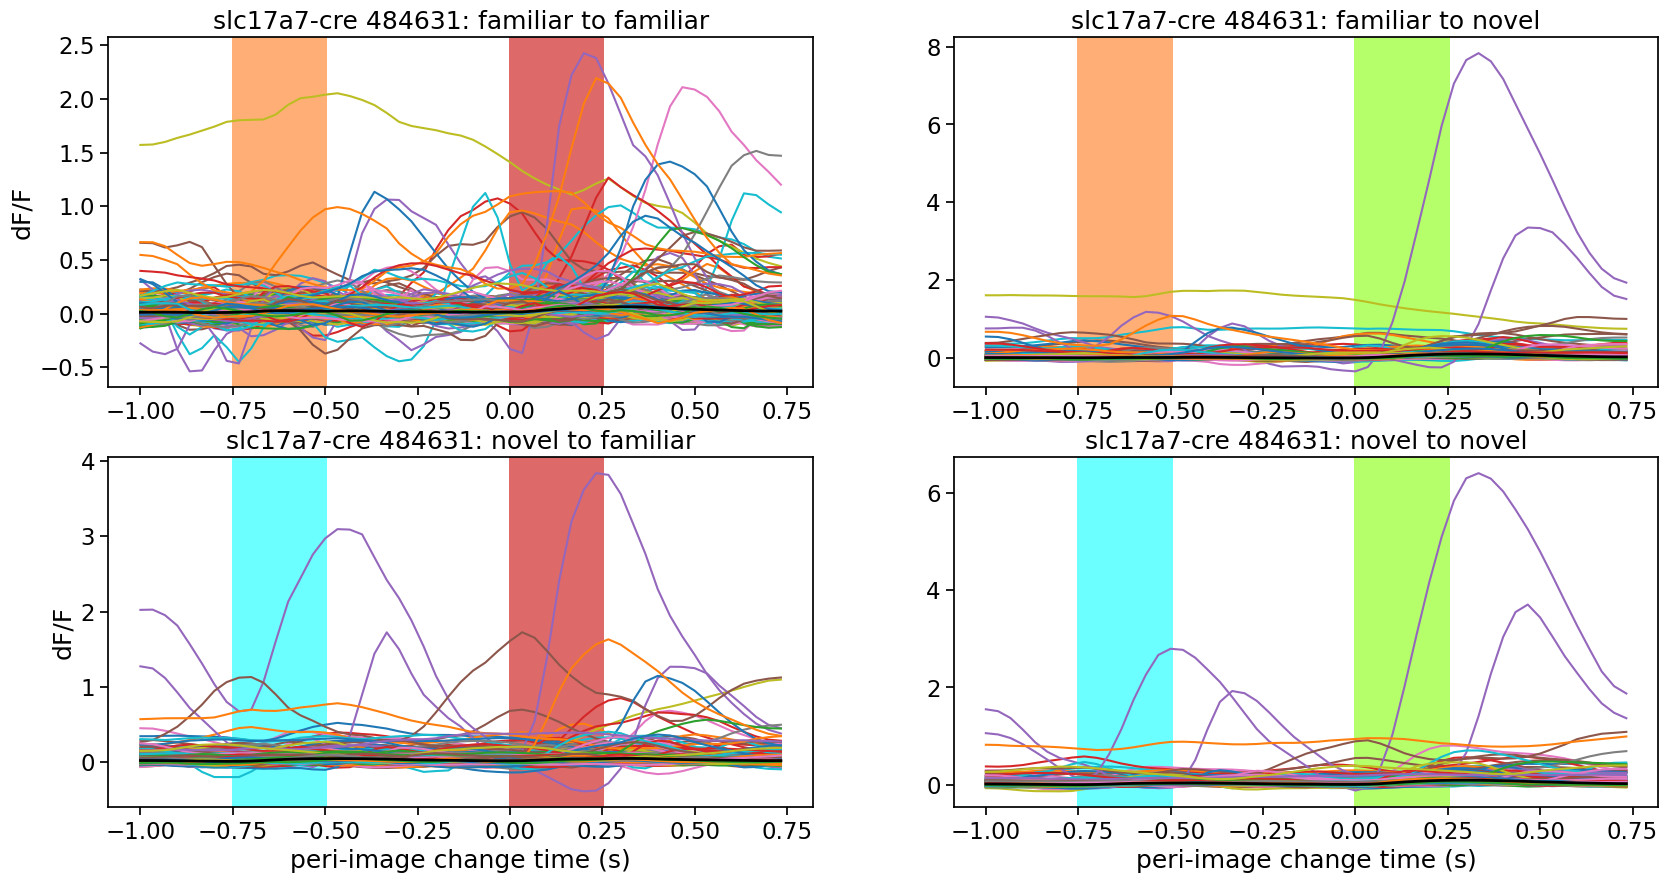

In [24]:
image_path = '/root/capsule/my_results/figures/figures_avgstackedcells_imagechange/'

# Plot events for all cells: ∆F/F
fig, ax = plt.subplots(2,2,figsize=(20, 10))

# Plot familiar to familiar transitions
for cell_specimen_id in stim_response_stack_ff.cell_specimen_id.unique():
    # get the relevant data
    cell_df = stim_response_stack_ff[stim_response_stack_ff.cell_specimen_id==cell_specimen_id]
    # get the average dff trace
    mean_trace = cell_df.dff_trace.mean()
    # get the timestamps for one row ()
    timestamps = cell_df.trace_timestamps.values[0]
    ax[0, 0].plot(timestamps, mean_trace)
    ax[0, 0].axvspan(-0.75, -0.5, color='#FFAF75', alpha=0.05) # familiar image
    ax[0, 0].axvspan(0, 0.25, color='#DD6969', alpha=0.05) # different familiar image
    #ax[0, 0].set_ylim([-0.4, 0.8])
    ax[0, 0].set_ylabel('dF/F')
    ax[0, 0].set_title(str(end_folder) + ' ' + str(curr_mouse_id) + ': familiar to familiar')

mean_ff_trace = stim_response_stack_ff.dff_trace.mean()
timestamps = stim_response_stack_ff.trace_timestamps.values[0]
ax[0, 0].plot(timestamps, mean_ff_trace, color='black', linewidth=2)

    
    
# Plot familiar to novel transitions
for cell_specimen_id in stim_response_stack_fn.cell_specimen_id.unique():
    # get the relevant data
    cell_df = stim_response_stack_fn[stim_response_stack_fn.cell_specimen_id==cell_specimen_id]
    # get the average dff trace
    mean_trace = cell_df.dff_trace.mean()
    # get the timestamps for one row ()
    timestamps = cell_df.trace_timestamps.values[0]
    ax[0, 1].plot(timestamps, mean_trace)
    ax[0, 1].axvspan(-0.75, -0.5, color='#FFAF75', alpha=0.05) # familiar image
    ax[0, 1].axvspan(0, 0.25, color='#B5FF6B', alpha=0.05) # novel image
    #ax[0, 1].set_ylim([-0.4, 0.8])
    ax[0, 1].set_title(str(end_folder) + ' ' + str(curr_mouse_id) + ': familiar to novel')
    
mean_fn_trace = stim_response_stack_fn.dff_trace.mean()
timestamps = stim_response_stack_fn.trace_timestamps.values[0]
ax[0, 1].plot(timestamps, mean_fn_trace, color='black', linewidth=2)
    
    
    
# Plot novel to familiar transitions
for cell_specimen_id in stim_response_stack_nf.cell_specimen_id.unique():
    # get the relevant data
    cell_df = stim_response_stack_nf[stim_response_stack_nf.cell_specimen_id==cell_specimen_id]
    # get the average dff trace
    mean_trace = cell_df.dff_trace.mean()
    # get the timestamps for one row ()
    timestamps = cell_df.trace_timestamps.values[0]
    ax[1, 0].plot(timestamps, mean_trace)
    ax[1, 0].axvspan(-0.75, -0.5, color='#6BFFFF', alpha=0.05) # novel image
    ax[1, 0].axvspan(0, 0.25, color='#DD6969', alpha=0.05) # familiar image
    #ax[1, 0].set_ylim([-0.4, 0.8])
    ax[1, 0].set_ylabel('dF/F')
    ax[1, 0].set_xlabel('peri-image change time (s)')
    ax[1, 0].set_title(str(end_folder) + ' ' + str(curr_mouse_id) + ': novel to familiar')
    
mean_nf_trace = stim_response_stack_nf.dff_trace.mean()
timestamps = stim_response_stack_nf.trace_timestamps.values[0]
ax[1, 0].plot(timestamps, mean_nf_trace, color='black', linewidth=2)    
    
    

# Plot novel to novel transitions
for cell_specimen_id in stim_response_stack_nn.cell_specimen_id.unique():
    # get the relevant data
    cell_df = stim_response_stack_nn[stim_response_stack_nn.cell_specimen_id==cell_specimen_id]
    # get the average dff trace
    mean_trace = cell_df.dff_trace.mean()
    # get the timestamps for one row ()
    timestamps = cell_df.trace_timestamps.values[0]
    ax[1, 1].plot(timestamps, mean_trace)
    ax[1, 1].axvspan(-0.75, -0.5, color='#6BFFFF', alpha=0.05) # novel image
    ax[1, 1].axvspan(0, 0.25, color='#B5FF6B', alpha=0.05) # different novel image
    #ax[1, 1].set_ylim([-0.4, 0.8])
    ax[1, 1].set_xlabel('peri-image change time (s)')
    ax[1, 1].set_title(str(end_folder) + ' ' + str(curr_mouse_id) + ': novel to novel')
    
mean_nn_trace = stim_response_stack_nn.dff_trace.mean()
timestamps = stim_response_stack_nn.trace_timestamps.values[0]
ax[1, 1].plot(timestamps, mean_nn_trace, color='black', linewidth=2) 


    
# Save as SVG
#plt.savefig(image_path+'dff_'+curr_name_svg, format="svg")

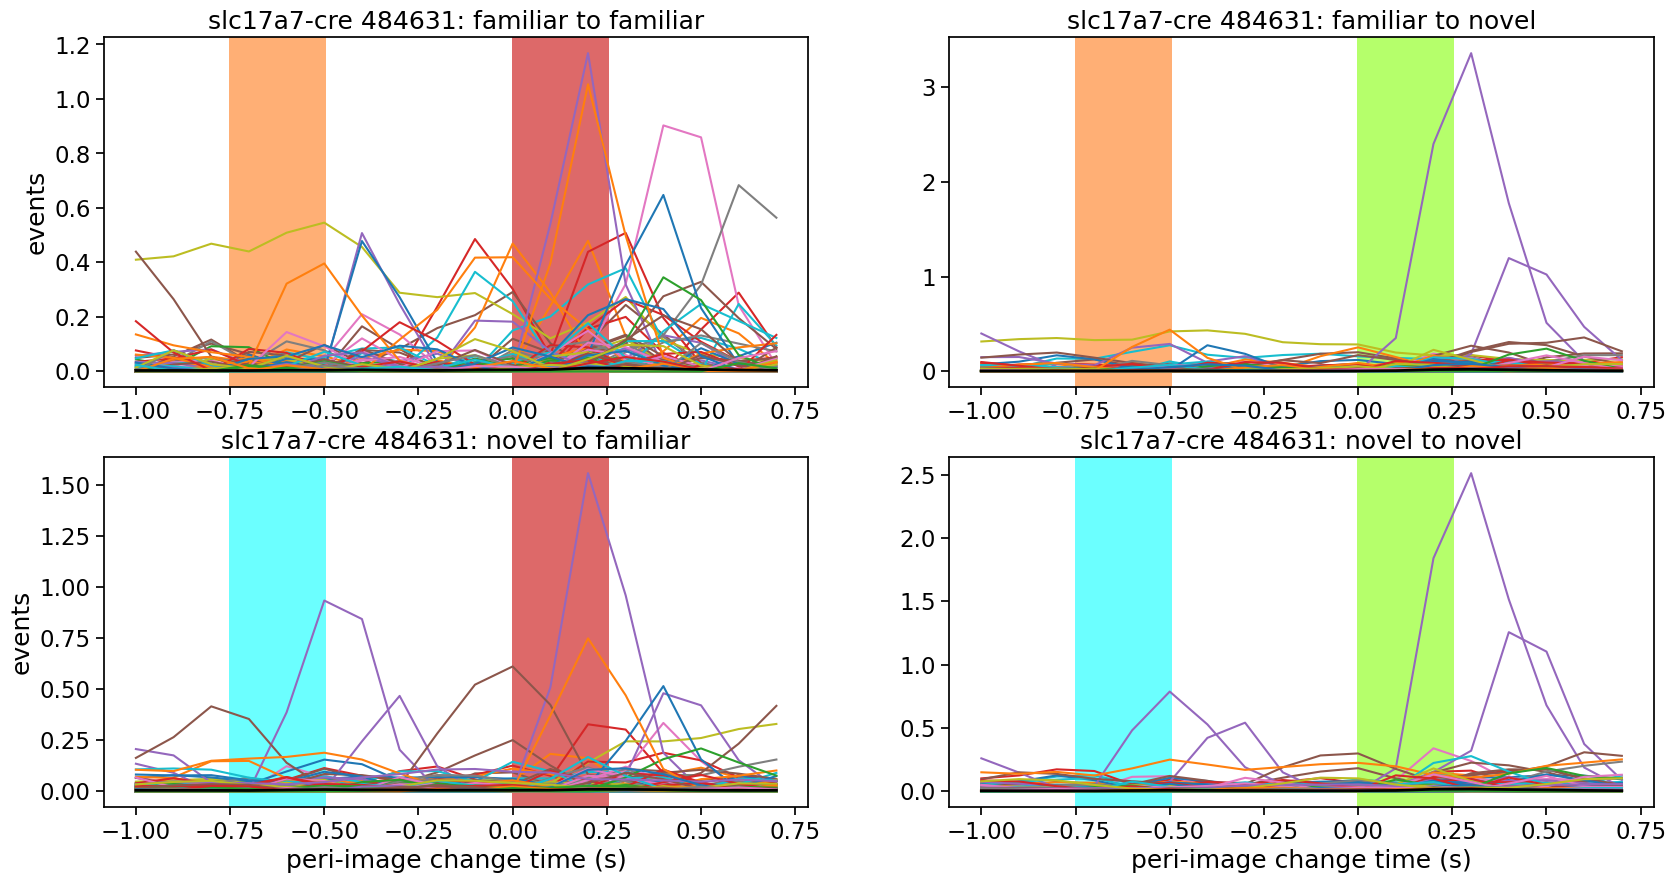

In [25]:
# Plot events for all cells: events
fig, ax = plt.subplots(2,2,figsize=(20, 10))

# Plot familiar to familiar transitions
for cell_specimen_id in stim_response_stack_ff.cell_specimen_id.unique():
    # get the relevant data
    cell_df = stim_response_stack_ff[stim_response_stack_ff.cell_specimen_id==cell_specimen_id]
    # get the average dff trace
    mean_trace = cell_df.filtered_events_trace.mean()
    # get the timestamps for one row ()
    timestamps = cell_df.filtered_events_trace_timestamps.values[0]
    ax[0, 0].plot(timestamps, mean_trace)
    ax[0, 0].axvspan(-0.75, -0.5, color='#FFAF75', alpha=0.05) # familiar image
    ax[0, 0].axvspan(0, 0.25, color='#DD6969', alpha=0.05) # different familiar image
    #ax[0, 0].set_ylim([-0.4, 0.8])
    ax[0, 0].set_ylabel('events')
    ax[0, 0].set_title(str(end_folder) + ' ' + str(curr_mouse_id) + ': familiar to familiar')

mean_ff_trace = stim_response_stack_ff.filtered_events_trace.mean()
timestamps = stim_response_stack_ff.filtered_events_trace_timestamps.values[0]
ax[0, 0].plot(timestamps, mean_ff_trace, color='black', linewidth=2)

    
    
# Plot familiar to novel transitions
for cell_specimen_id in stim_response_stack_fn.cell_specimen_id.unique():
    # get the relevant data
    cell_df = stim_response_stack_fn[stim_response_stack_fn.cell_specimen_id==cell_specimen_id]
    # get the average dff trace
    mean_trace = cell_df.filtered_events_trace.mean()
    # get the timestamps for one row ()
    timestamps = cell_df.filtered_events_trace_timestamps.values[0]
    ax[0, 1].plot(timestamps, mean_trace)
    ax[0, 1].axvspan(-0.75, -0.5, color='#FFAF75', alpha=0.05) # familiar image
    ax[0, 1].axvspan(0, 0.25, color='#B5FF6B', alpha=0.05) # novel image
    #ax[0, 1].set_ylim([-0.4, 0.8])
    ax[0, 1].set_title(str(end_folder) + ' ' + str(curr_mouse_id) + ': familiar to novel')
    
mean_fn_trace = stim_response_stack_fn.filtered_events_trace.mean()
timestamps = stim_response_stack_fn.filtered_events_trace_timestamps.values[0]
ax[0, 1].plot(timestamps, mean_fn_trace, color='black', linewidth=2)
    
    
    
# Plot novel to familiar transitions
for cell_specimen_id in stim_response_stack_nf.cell_specimen_id.unique():
    # get the relevant data
    cell_df = stim_response_stack_nf[stim_response_stack_nf.cell_specimen_id==cell_specimen_id]
    # get the average dff trace
    mean_trace = cell_df.filtered_events_trace.mean()
    # get the timestamps for one row ()
    timestamps = cell_df.filtered_events_trace_timestamps.values[0]
    ax[1, 0].plot(timestamps, mean_trace)
    ax[1, 0].axvspan(-0.75, -0.5, color='#6BFFFF', alpha=0.05) # novel image
    ax[1, 0].axvspan(0, 0.25, color='#DD6969', alpha=0.05) # familiar image
    #ax[1, 0].set_ylim([-0.4, 0.8])
    ax[1, 0].set_ylabel('events')
    ax[1, 0].set_xlabel('peri-image change time (s)')
    ax[1, 0].set_title(str(end_folder) + ' ' + str(curr_mouse_id) + ': novel to familiar')
    
mean_nf_trace = stim_response_stack_nf.filtered_events_trace.mean()
timestamps = stim_response_stack_nf.filtered_events_trace_timestamps.values[0]
ax[1, 0].plot(timestamps, mean_nf_trace, color='black', linewidth=2)    
    
    

# Plot novel to novel transitions
for cell_specimen_id in stim_response_stack_nn.cell_specimen_id.unique():
    # get the relevant data
    cell_df = stim_response_stack_nn[stim_response_stack_nn.cell_specimen_id==cell_specimen_id]
    # get the average dff trace
    mean_trace = cell_df.filtered_events_trace.mean()
    # get the timestamps for one row ()
    timestamps = cell_df.filtered_events_trace_timestamps.values[0]
    ax[1, 1].plot(timestamps, mean_trace)
    ax[1, 1].axvspan(-0.75, -0.5, color='#6BFFFF', alpha=0.05) # novel image
    ax[1, 1].axvspan(0, 0.25, color='#B5FF6B', alpha=0.05) # different novel image
    #ax[1, 1].set_ylim([-0.4, 0.8])
    ax[1, 1].set_xlabel('peri-image change time (s)')
    ax[1, 1].set_title(str(end_folder) + ' ' + str(curr_mouse_id) + ': novel to novel')
    
mean_nn_trace = stim_response_stack_nn.filtered_events_trace.mean()
timestamps = stim_response_stack_nn.filtered_events_trace_timestamps.values[0]
ax[1, 1].plot(timestamps, mean_nn_trace, color='black', linewidth=2) 
    
# Save as SVG
#plt.savefig(image_path+'events_'+curr_name_svg, format="svg")

In [26]:
print('All done!')

All done!


In [3]:
import seaborn as sns


In [4]:
hues = sns.color_palette("husl", 8)

In [5]:
hues

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.8087954113106306, 0.5634700050056693, 0.19502642696727285),
 (0.5920891529639701, 0.6418467016378244, 0.1935069134991043),
 (0.19783576093349015, 0.6955516966063037, 0.3995301037444499),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.22335772267769388, 0.6565792317435265, 0.8171355503265633),
 (0.6423044349219739, 0.5497680051256467, 0.9582651433656727),
 (0.9603888539940703, 0.3814317878772117, 0.8683117650835491)]

In [9]:
hues_novel = hues[:8]

In [10]:
len(hues_novel)

8

In [11]:
hues_novel

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.8087954113106306, 0.5634700050056693, 0.19502642696727285),
 (0.5920891529639701, 0.6418467016378244, 0.1935069134991043),
 (0.19783576093349015, 0.6955516966063037, 0.3995301037444499),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.22335772267769388, 0.6565792317435265, 0.8171355503265633),
 (0.6423044349219739, 0.5497680051256467, 0.9582651433656727),
 (0.9603888539940703, 0.3814317878772117, 0.8683117650835491)]